# EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Notebook

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro


In [4]:
import statsmodels.api as sm

In [6]:
data=pd.read_csv("Mall_Customers.csv")

In [7]:
data.shape

(200, 5)

In [8]:
#The Dataset contains 5 Features and 200 observations 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#There are 4 features' Values of type int 
#and 1 feature's values of type object --> needs to get encoded 
#data contains no Null/missing Values 

In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
#Age: 
#customers' age ranges from 18 to 70 y/o
#mean and median(50%) are slightly close --> No Outliers 

#Annual Income (k$) 
#Customers' annual income ranges from 15K$ to 137K$ 
#Customers who are 49 y/o and more earns more than 75% of other customers 
#and their spending score is 73 or higher 

#for all Features 
#_50% of Customers are more than 36 y/o, earn more than 61.5K$ per year 
#and have Spending Score more than 50


# Visualization

In [13]:
def box_plot(data,label):
    
    sns.set(style="whitegrid")
    sns.boxplot(data).set(xlabel=label)

# Figure 1

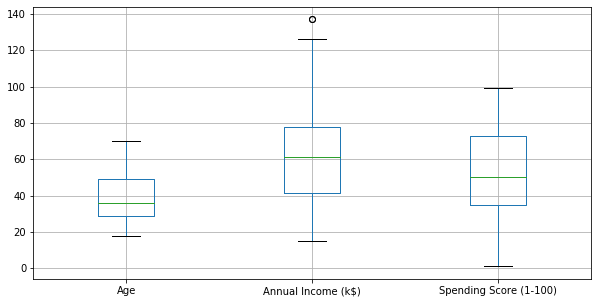

In [14]:
data.boxplot(["Age","Annual Income (k$)","Spending Score (1-100)"],figsize=(10,5))

In [15]:
#Age
#IQR from 28 to 48 
#50% of our Customers ranges from 28 to 48 y/o

#Annual Income (k$)
#IQR from 41 to 77 
#50% of our Customers` annual income ranges from 41 K$ to 77 K$
#it`s clear that Annual Income (k$) has an outlier (137)

#Spending Score (1-100)
#IQR from 34 to 72
#50% of our Customers have Spending Score from 34 to 72 points


# Figure 2

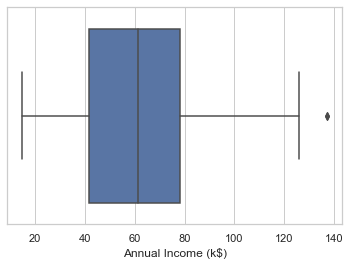

In [16]:
box_plot(data['Annual Income (k$)'],"Annual Income (k$)")

In [17]:
#Annual Income (K$)
#75% of our customers earns less than 78 K$ per year 

In [18]:
data[data["Annual Income (k$)"]==137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [19]:
mean_w_o_outlier=np.mean(data.iloc[:198,3])
mean_w_outlier=np.mean(data.iloc[:,3])
median_w_o_outlier=np.median(data.iloc[:198,3])
median_w_outlier=np.median(data.iloc[:,3])

print("mean without the outliers",mean_w_o_outlier)
print("mean with the outliers",mean_w_outlier)
print("median without the outliers",median_w_o_outlier)
print("median with the outliers",median_w_outlier)

mean without the outliers 59.78787878787879
mean with the outliers 60.56
median without the outliers 61.0
median with the outliers 61.5


In [20]:
#since the difference between the mean,median with and without the outliers is very small 
#There for we can keep them
#"they have no effect on the mean and the median" 
#after research I found that 136 K$ per year is realistic number because salaries in this city are high

# Figure 3,4,5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1036157B8>,
      dtype=object)

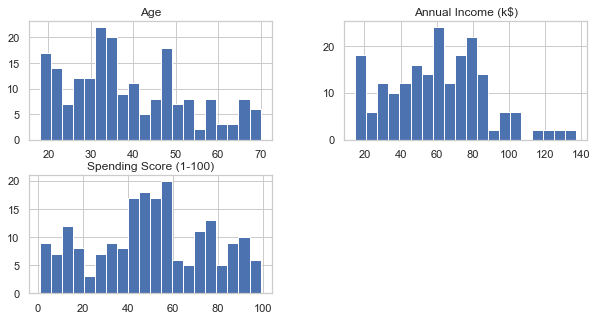

In [21]:
data.hist(["Age","Annual Income (k$)","Spending Score (1-100)"],figsize=(10,5),bins=20)

In [22]:
#most of our customers` are less than 50 y/o
#most of our cusmters earns less than 80 K$ per year
#spending score is normally distributed 

# Figure 6

Text(0, 0.5, 'Spending Score (1-100)')

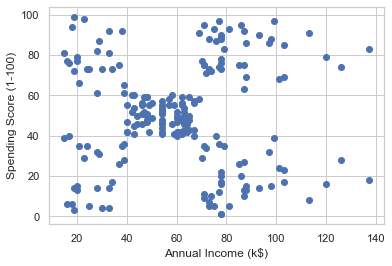

In [23]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [24]:
#there are 5 clusters 

In [25]:
male=data[data["Gender"]=="Male"]
female=data[data["Gender"]=="Female"]
female=female.sample(88,random_state=42)
len(female)

88

# Figure 7

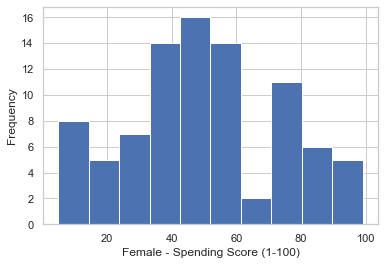

In [26]:
female["Spending Score (1-100)"].hist()
plt.xlabel("Female - Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

# Figure 8

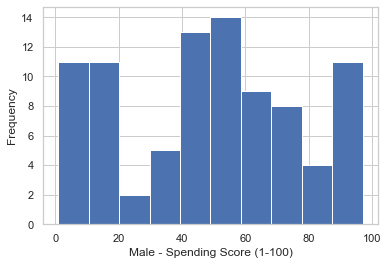

In [27]:
male["Spending Score (1-100)"].hist()
plt.xlabel("Male - Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

# Hypothesis Testing 

In [29]:
stat,p_male=shapiro(male["Spending Score (1-100)"])
stat,p_female=shapiro(female["Spending Score (1-100)"])

stat_data,p_data=shapiro(data["Spending Score (1-100)"])
p_male

0.0026273364201188087

In [30]:
#testing normality 
#for males and all data 
#p-value is less than alpha .05 so it is not normally distributed  
#for females 
#p-value is more than .05 so it is normally distibuted 
#but still we can try using one-way ANOVA and Kruskal-Wallis tests

# Hypothesis Test 1 

In [31]:
# Question 
# Does the gender of customers affect Spending Score ?

In [32]:
#H0 :  the gender does not affect Spending Score 
#H1 : the gender affects Spending Score  
#alpha= .05

In [33]:
stats.f_oneway(male["Spending Score (1-100)"],female["Spending Score (1-100)"])

F_onewayResult(statistic=0.15946337745964337, pvalue=0.6901407573084232)

In [34]:
stats.kruskal(male["Spending Score (1-100)"],female["Spending Score (1-100)"])


KruskalResult(statistic=0.026977438382298234, pvalue=0.8695358368390939)

In [35]:
#Results : one-way ANOVA and Kruskal-Wallis tests have pvalue greater than .05 
#pvalue > alpha 
#0.57 or 0.41 > .05
#therefore we will accept the Null Hypothesis

# Hypothesis Test 2 

In [36]:
# Q is the average spending score for male customers differ from female customers ?

In [37]:
#H0: the mean spending score for male customers equals the mean of female customer 
#H1: the mean spending score for male customers does not equal the mean of female customers

In [38]:
stats.ttest_ind(male["Spending Score (1-100)"],female["Spending Score (1-100)"])

Ttest_indResult(statistic=-0.39932865845020926, pvalue=0.6901407573084256)

In [39]:
#Results : Welch’s t-test have pvalue greater than .05 
#pvalue > alpha 
#0.69 > .05
#therefore we will accept the Null Hypothesis
#the mean spending score for male customers equals the mean of female customer

# Hypothesis Test 3

In [40]:
# Q is the Annual Income a good variable to predict the Spending Score ?

In [41]:
#H0: The coefficients are zero (no relation between the two variables)
#H1: The coefficients are not zero (there is a relation between the two variables)

In [42]:
est = sm.OLS(data["Spending Score (1-100)"],data["Annual Income (k$)"])
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.670
Model:                                OLS   Adj. R-squared (uncentered):              0.668
Method:                     Least Squares   F-statistic:                              403.5
Date:                    Sat, 19 Oct 2019   Prob (F-statistic):                    9.26e-50
Time:                            18:05:00   Log-Likelihood:                         -979.58
No. Observations:                     200   AIC:                                      1961.
Df Residuals:                         199   BIC:                                      1964.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      

In [43]:
#Results : regression analysis test has pvalue of 0 
#pvalue < alpha 
#0 < .05
#therefore we will REJECT the Null Hypothesis
#there is a relation between the two variables 
#We can use the Annual Income to predict the Spending Score 

# Hypothesis Test 4

In [44]:
est = sm.OLS(data["Spending Score (1-100)"],data["Age"])
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.619
Model:                                OLS   Adj. R-squared (uncentered):              0.618
Method:                     Least Squares   F-statistic:                              323.9
Date:                    Sat, 19 Oct 2019   Prob (F-statistic):                    1.28e-43
Time:                            18:05:20   Log-Likelihood:                         -993.76
No. Observations:                     200   AIC:                                      1990.
Df Residuals:                         199   BIC:                                      1993.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-